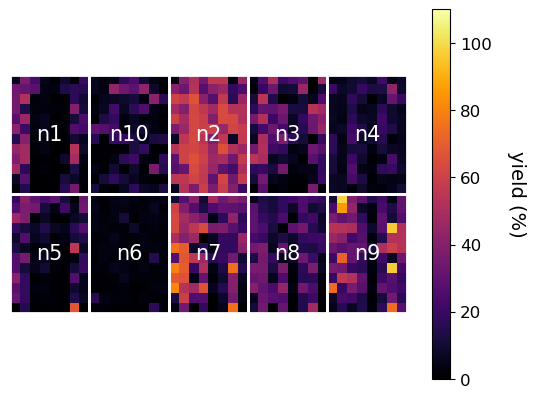

In [117]:
from amidation import plot_all_results
plot_all_results(single_component='activator')

In [ ]:
#Test for three representative algorithms

In [13]:
%%time
%%capture
import pandas as pd
from algos_regret import UCB1, ThompsonSamplingGaussianFixedVarSquared, BayesUCBGaussian
from chem_arms import simulate_propose_and_update
from utils import make_dir

# fetch ground truth data
ground_truth = pd.read_csv('../dataset/amidation.csv')

ground_truth['yield'] = ground_truth['yield'].apply(utils.scaler)
ground_truth = ground_truth[['activator_name', 'solvent_name', 'base_name', 'nucleophile_id', 'yield']]

bases = ground_truth['base_name'].unique()
activators = ground_truth['activator_name'].unique()
solvents = ground_truth['solvent_name'].unique()
nucleophiles = ground_truth['nucleophile_id'].unique()

# dictionaries, algos and other things for optimization
scope_dict = {'base_name': bases,
              'activator_name': activators,
              'solvent_name': solvents,
              'nucleophile_id': nucleophiles} 
arms_dict = {'activator_name': activators}
n_arms = len(activators)
algos = [UCB1(n_arms),
         ThompsonSamplingGaussianFixedVarSquared(n_arms),
         BayesUCBGaussian(n_arms, assumed_sd=0.25, c=2),]

# Some parameters for simulation function
# Note: we reduce the number of simulations and time horizon so it runs faster for this demo, the results might not be that accurate
wkdir = '../dataset_logs/amidation/'
num_sims = 150
num_round = 96
num_exp = 1

dirs = []  # for the plotting later

for algo in algos:
    dir_name = f'{wkdir}{algo.__str__()}-{num_sims}s-{num_round}r-{num_exp}e/'
    dirs.append(dir_name)
    make_dir(dir_name)

    simulate_propose_and_update(scope_dict, arms_dict, ground_truth, algo,
                                dir=dir_name,
                                num_sims=num_sims,
                                num_round=num_round,
                                num_exp=num_exp,
                                predict=False)

CPU times: user 49.4 s, sys: 1.85 s, total: 51.2 s
Wall time: 50.5 s


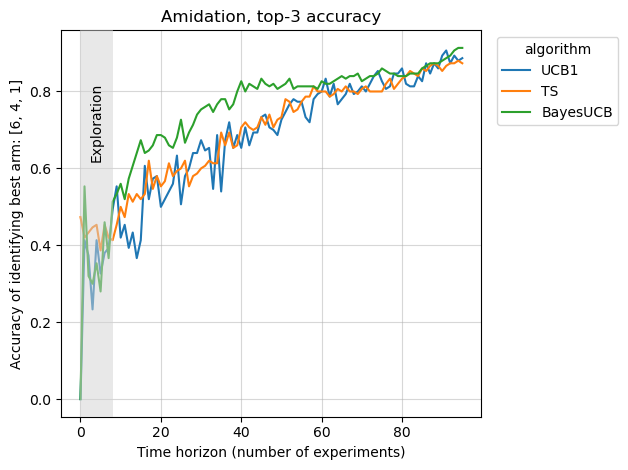

In [15]:
from chem_analyze import plot_accuracy_best_arm
import pickle

fn_list = [f'{d}log.csv' for d in dirs]
legend_list = ['UCB1', 'TS', 'BayesUCB']

# since algorithms use indexes to differentiate arms, and we use ligand names,
# we need to do a search here with a saved arms_dict during optimization
with open(f'{dirs[0]}/arms.pkl', 'rb') as f:
    arms_dict = pickle.load(f)
reverse_arms_dict = {v: k for k, v in arms_dict.items()}

# now we can find indexes for the top-3 ligands that we want.
top3 = ['DPPCl', 'BOP-Cl', 'TCFH']
activators = [(l,) for l in top3]  # arms_dict takes tuples
indexes = [reverse_arms_dict[l] for l in activators]

plot_accuracy_best_arm(best_arm_indexes=indexes,
                       fn_list=fn_list,
                       legend_list=legend_list,
                       shade_first_rounds=8,
                       title=f'Amidation, top-3 accuracy',
                       legend_title='algorithm',
                       long_legend=True)

In [72]:
#Test for five representative algorithms

In [17]:
%%time
%%capture
import pandas as pd
from algos_regret import EpsilonGreedy, UCB1, UCB1Tuned,ThompsonSamplingGaussianFixedVarSquared, BayesUCBGaussian
from chem_arms import simulate_propose_and_update
import utils
from utils import make_dir

ground_truth = pd.read_csv('../dataset/amidation.csv')
ground_truth['yield'] = ground_truth['yield'].apply(utils.scaler)
ground_truth = ground_truth[['activator_name', 'solvent_name', 'base_name', 'nucleophile_id', 'yield']]

bases = ground_truth['base_name'].unique()
activators = ground_truth['activator_name'].unique()
solvents = ground_truth['solvent_name'].unique()
nucleophiles = ground_truth['nucleophile_id'].unique()

# dictionaries, algos and other things for optimization
scope_dict = {'base_name': bases,
              'activator_name': activators,
              'solvent_name': solvents,
              'nucleophile_id': nucleophiles} 
arms_dict = {'activator_name': activators}
n_arms = len(activators)
algos = [EpsilonGreedy(n_arms, 0.1),
         UCB1(n_arms),
         UCB1Tuned(n_arms),
         ThompsonSamplingGaussianFixedVarSquared(n_arms),
         BayesUCBGaussian(n_arms, assumed_sd=0.25, c=2),]

wkdir = '../dataset_logs/amidation/'
num_sims = 500
num_round = 150
num_exp = 1

dirs = []  # for the plotting later

for algo in algos:
    dir_name = f'{wkdir}{algo.__str__()}-{num_sims}s-{num_round}r-{num_exp}e/'
    dirs.append(dir_name)
    make_dir(dir_name)

    simulate_propose_and_update(scope_dict, arms_dict, ground_truth, algo,
                                dir=dir_name,
                                num_sims=num_sims,
                                num_round=num_round,
                                num_exp=num_exp,
                                predict=False)

CPU times: user 8min 41s, sys: 19.6 s, total: 9min 1s
Wall time: 8min 58s


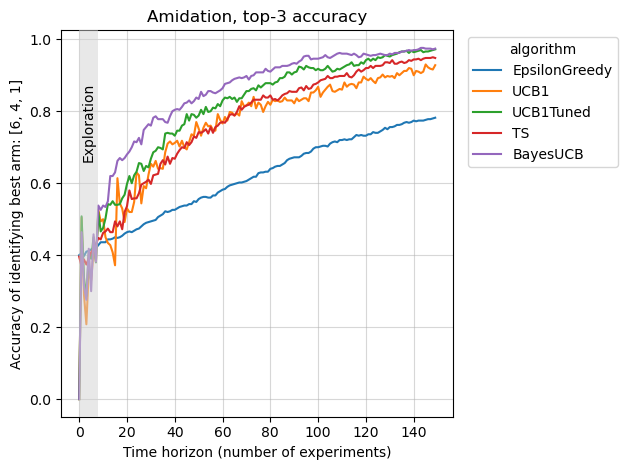

In [18]:
from chem_analyze import plot_accuracy_best_arm
import pickle

fn_list = [f'{d}log.csv' for d in dirs]
legend_list = ['EpsilonGreedy','UCB1', 'UCB1Tuned', 'TS', 'BayesUCB']

# since algorithms use indexes to differentiate arms, and we use ligand names,
# we need to do a search here with a saved arms_dict during optimization
with open(f'{dirs[0]}/arms.pkl', 'rb') as f:
    arms_dict = pickle.load(f)
reverse_arms_dict = {v: k for k, v in arms_dict.items()}

# now we can find indexes for the top-3 activators that we want.
top3 = ['DPPCl', 'BOP-Cl', 'TCFH']
activators = [(l,) for l in top3]  # arms_dict takes tuples
indexes = [reverse_arms_dict[l] for l in activators]

plot_accuracy_best_arm(best_arm_indexes=indexes,
                       fn_list=fn_list,
                       legend_list=legend_list,
                       shade_first_rounds=8,
                       title=f'Amidation, top-3 accuracy',
                       legend_title='algorithm',
                       long_legend=True)

In [ ]:
##Additional test for different BayesUCB algorithms and TS algorithms

In [ ]:
#####################
#test for different BayesUCB algorithms and Thompson Sampling algorithms

In [126]:
%%time
%%capture
import pandas as pd
from algos_regret import BayesUCBBeta, BayesUCBGaussian, BayesUCBBetaPPF, ThompsonSamplingBeta, ThompsonSamplingGaussianFixedVarSquared
from chem_arms import simulate_propose_and_update
import utils
from utils import make_dir

ground_truth = pd.read_csv('../dataset/amidation.csv')
ground_truth['yield'] = ground_truth['yield'].apply(utils.scaler)
ground_truth = ground_truth[['activator_name', 'solvent_name', 'base_name', 'nucleophile_id', 'yield']]

bases = ground_truth['base_name'].unique()
activators = ground_truth['activator_name'].unique()
solvents = ground_truth['solvent_name'].unique()
nucleophiles = ground_truth['nucleophile_id'].unique()

# dictionaries, algos and other things for optimization
scope_dict = {'base_name': bases,
              'activator_name': activators,
              'solvent_name': solvents,
              'nucleophile_id': nucleophiles} 
arms_dict = {'activator_name': activators}
n_arms = len(activators)
algos = [BayesUCBBeta(n_arms),
         BayesUCBGaussian(n_arms),
         BayesUCBBetaPPF(n_arms),
         ThompsonSamplingBeta(n_arms),
         ThompsonSamplingGaussianFixedVarSquared(n_arms),
        ]

wkdir = '../dataset_logs/amidation/'
num_sims = 200
num_round = 150
num_exp = 1

dirs = []  # for the plotting later

for algo in algos:
    dir_name = f'{wkdir}{algo.__str__()}-{num_sims}s-{num_round}r-{num_exp}e/'
    dirs.append(dir_name)
    make_dir(dir_name)

    simulate_propose_and_update(scope_dict, arms_dict, ground_truth, algo,
                                dir=dir_name,
                                num_sims=num_sims,
                                num_round=num_round,
                                num_exp=num_exp,
                                predict=False)

CPU times: user 3min 17s, sys: 5.09 s, total: 3min 22s
Wall time: 3min 21s


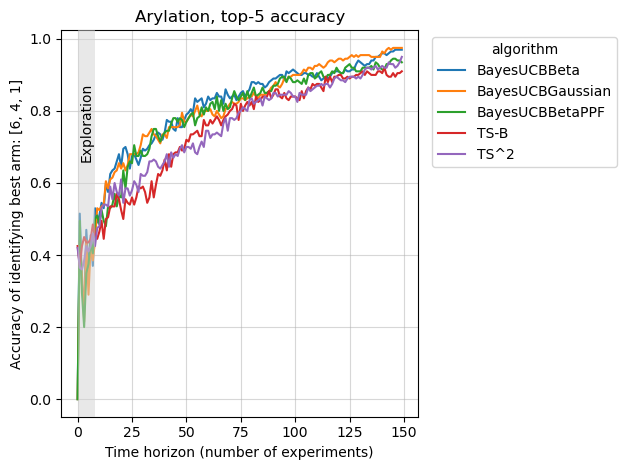

In [128]:
#test for different BayesUCB algorithms and TS algorithms
#Results shows BayesUCBGaussian gives the best performance in BayesUCB
# and ThompsonSamplingGaussianFixedVarSquared gives the best performance in TS algorithms
from chem_analyze import plot_accuracy_best_arm
import pickle

fn_list = [f'{d}log.csv' for d in dirs]
legend_list = ['BayesUCBBeta','BayesUCBGaussian', 'BayesUCBBetaPPF', 'TS-B', 'TS^2']

# since algorithms use indexes to differentiate arms, and we use ligand names,
# we need to do a search here with a saved arms_dict during optimization
with open(f'{dirs[0]}/arms.pkl', 'rb') as f:
    arms_dict = pickle.load(f)
reverse_arms_dict = {v: k for k, v in arms_dict.items()}

# now we can find indexes for the top-3 activators that we want.
top3 = ['DPPCl', 'BOP-Cl', 'TCFH']
activators = [(l,) for l in top3]  # arms_dict takes tuples
indexes = [reverse_arms_dict[l] for l in activators]

plot_accuracy_best_arm(best_arm_indexes=indexes,
                       fn_list=fn_list,
                       legend_list=legend_list,
                       shade_first_rounds=8,
                       title=f'Arylation, top-5 accuracy',
                       legend_title='algorithm',
                       long_legend=True)

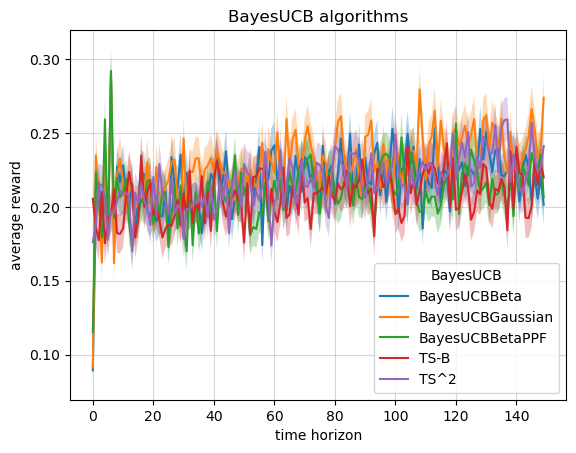

In [94]:
from analyze import plot_average_reward

plot_average_reward(
    fn_list=fn_list,
    legend_list=['BayesUCBBeta','BayesUCBGaussian', 'BayesUCBBetaPPF', 'TS-B', 'TS^2'],
    title='BayesUCB algorithms',
    legend_title='BayesUCB',
    show_se=True,
)

In [ ]:
#####################
#test for different BayesUCB algorithms 

In [60]:
%%time
%%capture
import pandas as pd
from algos_regret import BayesUCBBetaPPF, BayesUCBBeta, BayesUCBGaussian, BayesUCBGaussianSquared, BayesUCBGaussianPPF
from chem_arms import simulate_propose_and_update
import utils
from utils import make_dir

ground_truth = pd.read_csv('../dataset/amidation.csv')
ground_truth['yield'] = ground_truth['yield'].apply(utils.scaler)
ground_truth = ground_truth[['activator_name', 'solvent_name', 'base_name', 'nucleophile_id', 'yield']]

bases = ground_truth['base_name'].unique()
activators = ground_truth['activator_name'].unique()
solvents = ground_truth['solvent_name'].unique()
nucleophiles = ground_truth['nucleophile_id'].unique()

# dictionaries, algos and other things for optimization
scope_dict = {'base_name': bases,
              'activator_name': activators,
              'solvent_name': solvents,
              'nucleophile_id': nucleophiles} 
arms_dict = {'activator_name': activators}
n_arms = len(activators)
algos = [BayesUCBBetaPPF(n_arms),
         BayesUCBBeta(n_arms),
         BayesUCBGaussian(n_arms),
         BayesUCBGaussianSquared(n_arms),
         BayesUCBGaussianPPF(n_arms),
        ]

wkdir = '../dataset_logs/amidation/'
num_sims = 200
num_round = 150
num_exp = 1

dirs = []  # for the plotting later

for algo in algos:
    dir_name = f'{wkdir}{algo.__str__()}-{num_sims}s-{num_round}r-{num_exp}e/'
    dirs.append(dir_name)
    make_dir(dir_name)

    simulate_propose_and_update(scope_dict, arms_dict, ground_truth, algo,
                                dir=dir_name,
                                num_sims=num_sims,
                                num_round=num_round,
                                num_exp=num_exp,
                                predict=False)

CPU times: user 3min 23s, sys: 5.93 s, total: 3min 29s
Wall time: 3min 27s


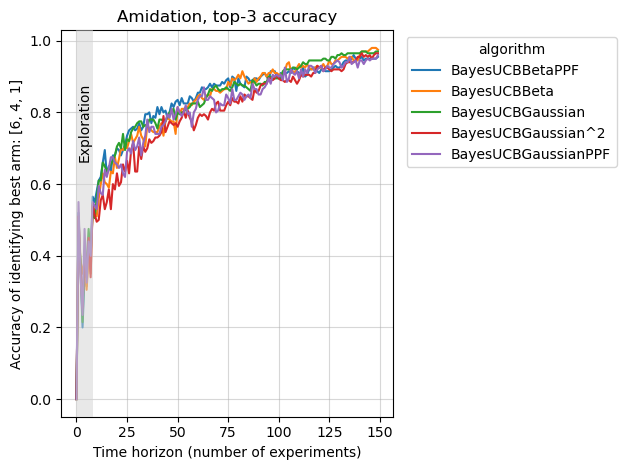

In [63]:
#test for different BayesUCB algorithms and TS algorithms
#Results shows BayesUCBGaussian gives the best performance in BayesUCB
# and ThompsonSamplingGaussianFixedVarSquared gives the best performance in TS algorithms
from chem_analyze import plot_accuracy_best_arm
import pickle

fn_list = [f'{d}log.csv' for d in dirs]
legend_list = ['BayesUCBBetaPPF','BayesUCBBeta', 'BayesUCBGaussian', 'BayesUCBGaussian^2', 'BayesUCBGaussianPPF']

# since algorithms use indexes to differentiate arms, and we use ligand names,
# we need to do a search here with a saved arms_dict during optimization
with open(f'{dirs[0]}/arms.pkl', 'rb') as f:
    arms_dict = pickle.load(f)
reverse_arms_dict = {v: k for k, v in arms_dict.items()}

# now we can find indexes for the top-3 activators that we want.
top3 = ['DPPCl', 'BOP-Cl', 'TCFH']
activators = [(l,) for l in top3]  # arms_dict takes tuples
indexes = [reverse_arms_dict[l] for l in activators]

plot_accuracy_best_arm(best_arm_indexes=indexes,
                       fn_list=fn_list,
                       legend_list=legend_list,
                       shade_first_rounds=8,
                       title=f'Amidation, top-3 accuracy',
                       legend_title='algorithm',
                       long_legend=True)

In [ ]:
#####################
#test for different assumed sd and c values for BayesUCBGaussian and BayesUCBGaussianSquared

In [65]:
%%time
%%capture
import pandas as pd
from algos_regret import BayesUCBGaussian, BayesUCBGaussianSquared
from chem_arms import simulate_propose_and_update
import utils
from utils import make_dir

ground_truth = pd.read_csv('../dataset/amidation.csv')
ground_truth['yield'] = ground_truth['yield'].apply(utils.scaler)
ground_truth = ground_truth[['activator_name', 'solvent_name', 'base_name', 'nucleophile_id', 'yield']]

bases = ground_truth['base_name'].unique()
activators = ground_truth['activator_name'].unique()
solvents = ground_truth['solvent_name'].unique()
nucleophiles = ground_truth['nucleophile_id'].unique()

# dictionaries, algos and other things for optimization
scope_dict = {'base_name': bases,
              'activator_name': activators,
              'solvent_name': solvents,
              'nucleophile_id': nucleophiles} 
arms_dict = {'activator_name': activators}
n_arms = len(activators)
algos = [BayesUCBGaussian(n_arms, assumed_sd=0.25, c=1),
         BayesUCBGaussian(n_arms, assumed_sd=0.25, c=2),
         BayesUCBGaussian(n_arms, assumed_sd=0.5, c=2),
         BayesUCBGaussian(n_arms, assumed_sd=0.75, c=2),
         BayesUCBGaussian(n_arms, assumed_sd=1, c=2),
         BayesUCBGaussianSquared(n_arms, c=1),
         BayesUCBGaussianSquared(n_arms, c=2),
        ]

wkdir = '../dataset_logs/amidation/'
num_sims = 200
num_round = 96
num_exp = 1

dirs = []  # for the plotting later

for algo in algos:
    dir_name = f'{wkdir}{algo.__str__()}-{num_sims}s-{num_round}r-{num_exp}e/'
    dirs.append(dir_name)
    make_dir(dir_name)

    simulate_propose_and_update(scope_dict, arms_dict, ground_truth, algo,
                                dir=dir_name,
                                num_sims=num_sims,
                                num_round=num_round,
                                num_exp=num_exp,
                                predict=False)

CPU times: user 2min 39s, sys: 6.33 s, total: 2min 45s
Wall time: 2min 43s


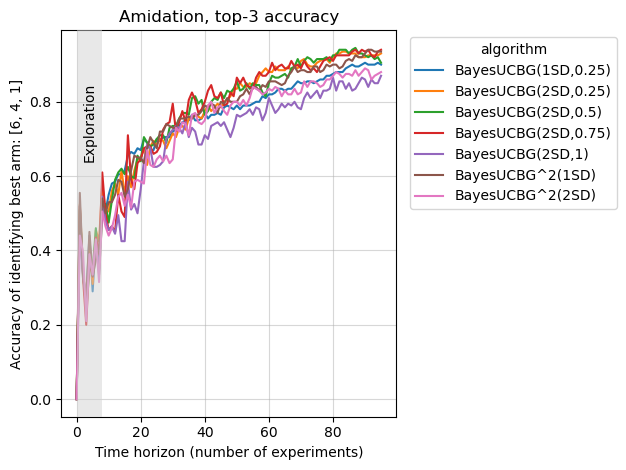

In [67]:
#test for different assumed sd and c values for BayesUCBGaussian and BayesUCBGaussianSquared
from chem_analyze import plot_accuracy_best_arm
import pickle

fn_list = [f'{d}log.csv' for d in dirs]
legend_list = ['BayesUCBG(1SD,0.25)','BayesUCBG(2SD,0.25)', 'BayesUCBG(2SD,0.5)', 'BayesUCBG(2SD,0.75)', 'BayesUCBG(2SD,1)', 'BayesUCBG^2(1SD)', 'BayesUCBG^2(2SD)']

# since algorithms use indexes to differentiate arms, and we use ligand names,
# we need to do a search here with a saved arms_dict during optimization
with open(f'{dirs[0]}/arms.pkl', 'rb') as f:
    arms_dict = pickle.load(f)
reverse_arms_dict = {v: k for k, v in arms_dict.items()}

# now we can find indexes for the top-3 activators that we want.
top3 = ['DPPCl', 'BOP-Cl', 'TCFH']
activators = [(l,) for l in top3]  # arms_dict takes tuples
indexes = [reverse_arms_dict[l] for l in activators]

plot_accuracy_best_arm(best_arm_indexes=indexes,
                       fn_list=fn_list,
                       legend_list=legend_list,
                       shade_first_rounds=8,
                       title=f'Amidation, top-3 accuracy',
                       legend_title='algorithm',
                       long_legend=True)